In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/starbucks.csv")

In [5]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [7]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [8]:
data.shape

(242, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [10]:
data.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [12]:
# Remove leading spaces in column names
data.columns = data.columns.str.strip()

In [13]:
# Convert 'Caffeine (mg)' column to numeric, handling errors
data['Caffeine (mg)'] = pd.to_numeric(data['Caffeine (mg)'], errors='coerce')

In [14]:
print(data.head())

         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   


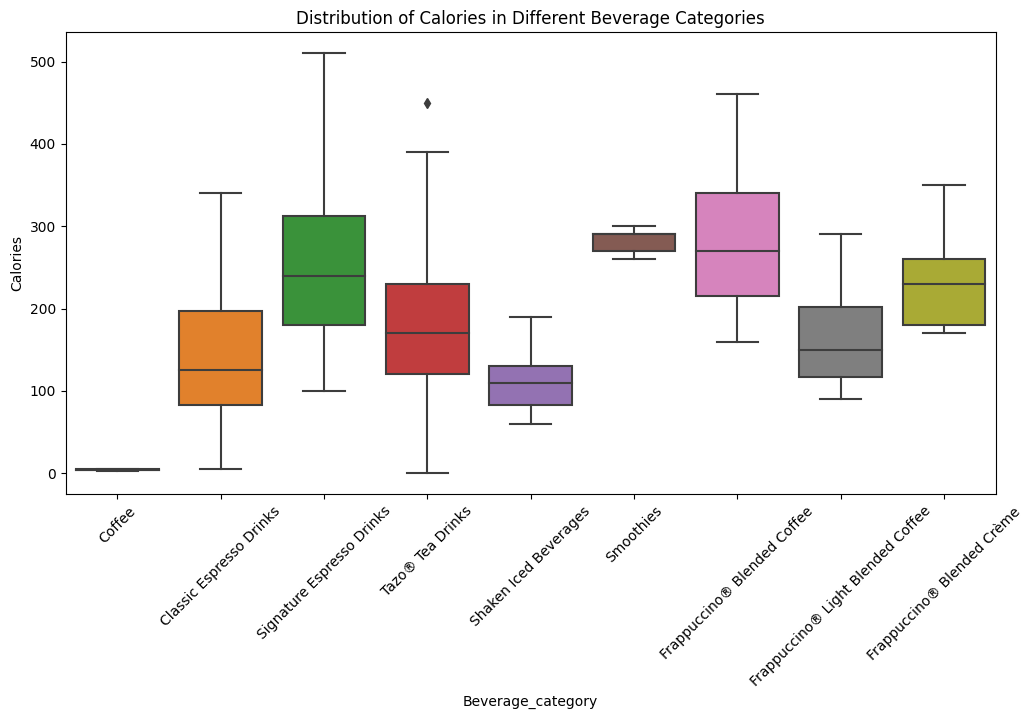

In [16]:
# Visualization 1: Distribution of Calories in Different Beverage Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beverage_category', y='Calories', data=data)
plt.title('Distribution of Calories in Different Beverage Categories')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-488e847248a0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[nutritional_columns].corr()


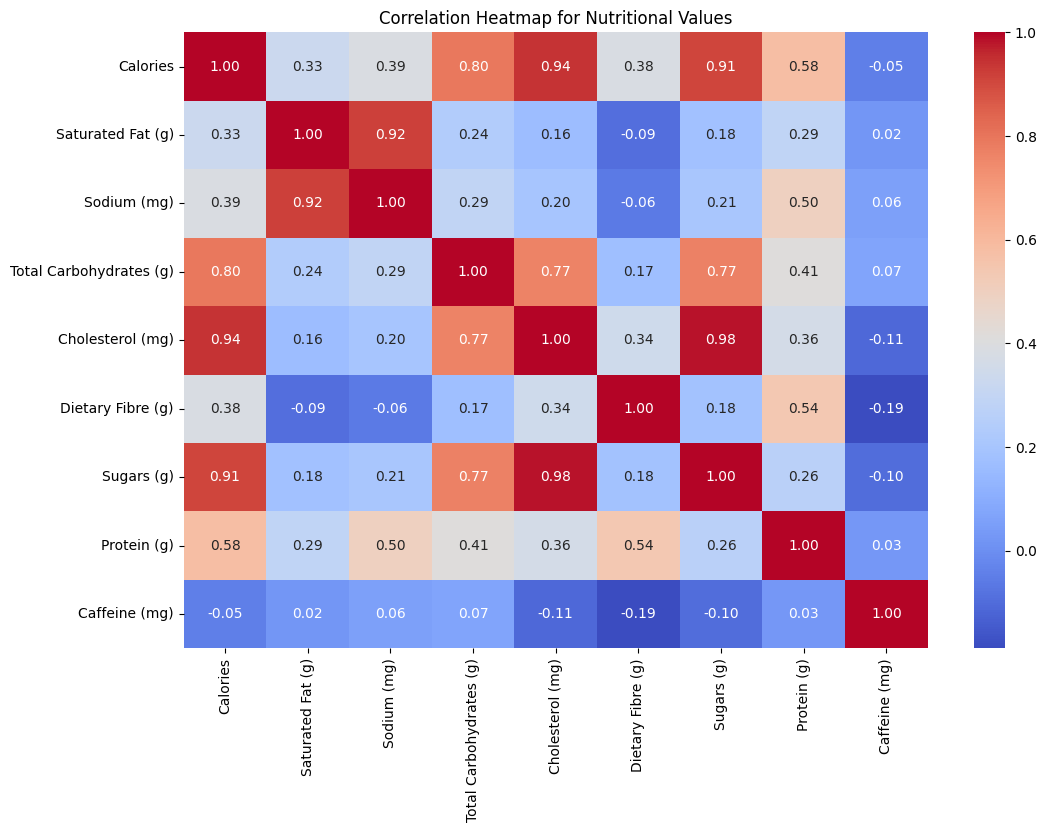

In [18]:
# Visualization 2: Correlation Heatmap for Nutritional Values
nutritional_columns = ['Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
                        'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
                        'Sugars (g)', 'Protein (g)', 'Caffeine (mg)']
plt.figure(figsize=(12, 8))
correlation_matrix = data[nutritional_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Nutritional Values')
plt.show()

<ipython-input-19-7a137a589320>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Beverage_prep', y='Caffeine (mg)', data=data, ci=None)


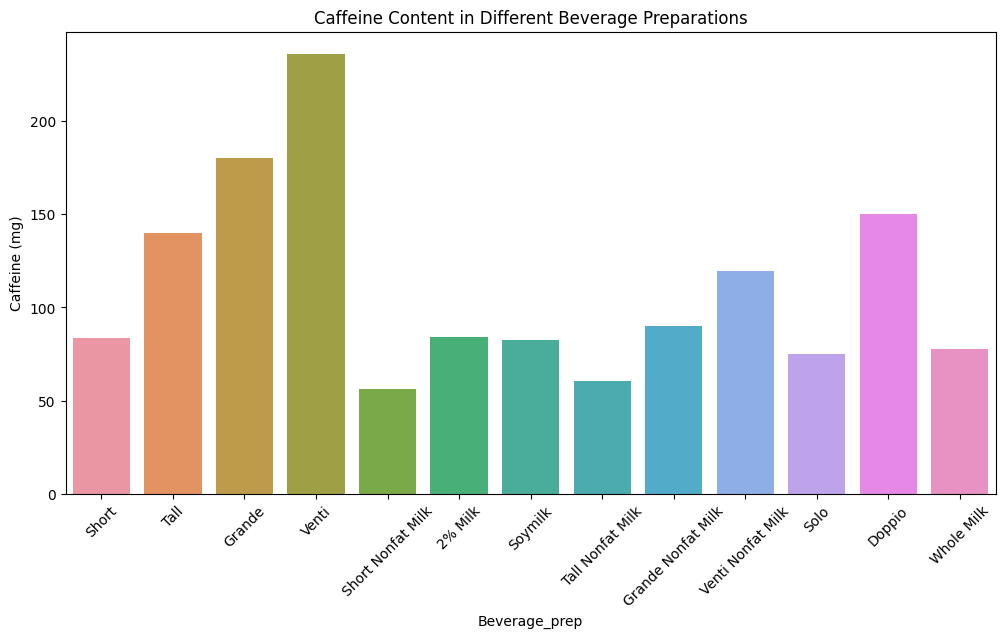

In [19]:
# Visualization 3: Caffeine Content in Different Beverage Preparations
plt.figure(figsize=(12, 6))
sns.barplot(x='Beverage_prep', y='Caffeine (mg)', data=data, ci=None)
plt.title('Caffeine Content in Different Beverage Preparations')
plt.xticks(rotation=45)
plt.show()

# Univariate Analysis:


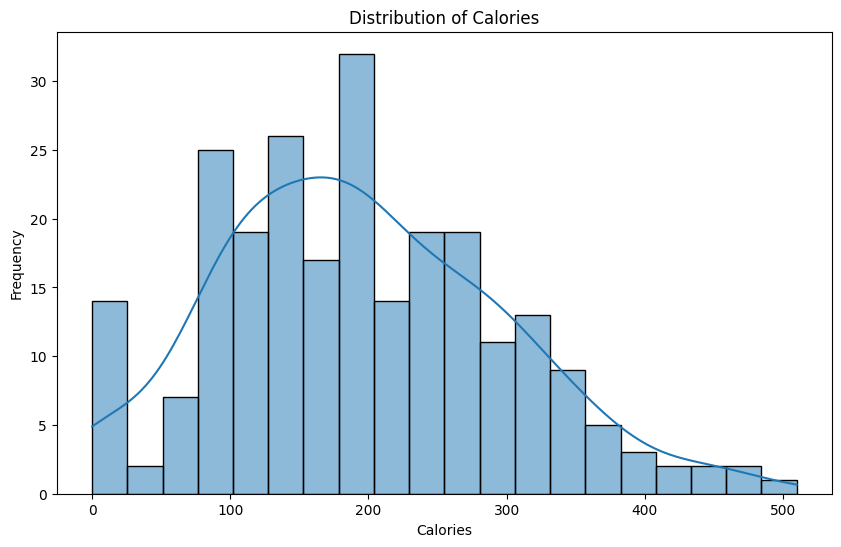

In [20]:
#1. Distribution of Calories
plt.figure(figsize=(10, 6))
sns.histplot(data['Calories'], bins=20, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


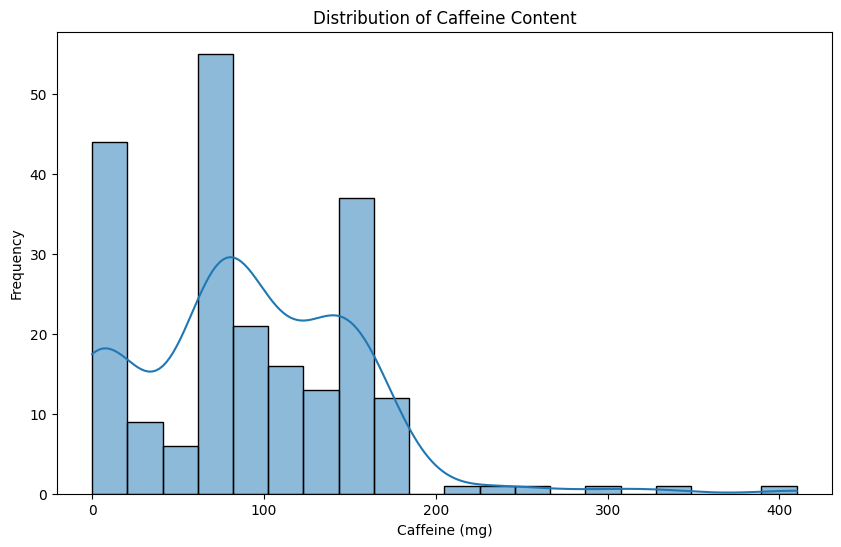

In [21]:
#2. Distribution of Caffeine Content
plt.figure(figsize=(10, 6))
sns.histplot(data['Caffeine (mg)'].dropna(), bins=20, kde=True)
plt.title('Distribution of Caffeine Content')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Frequency')
plt.show()


# Bivariate Analysis:



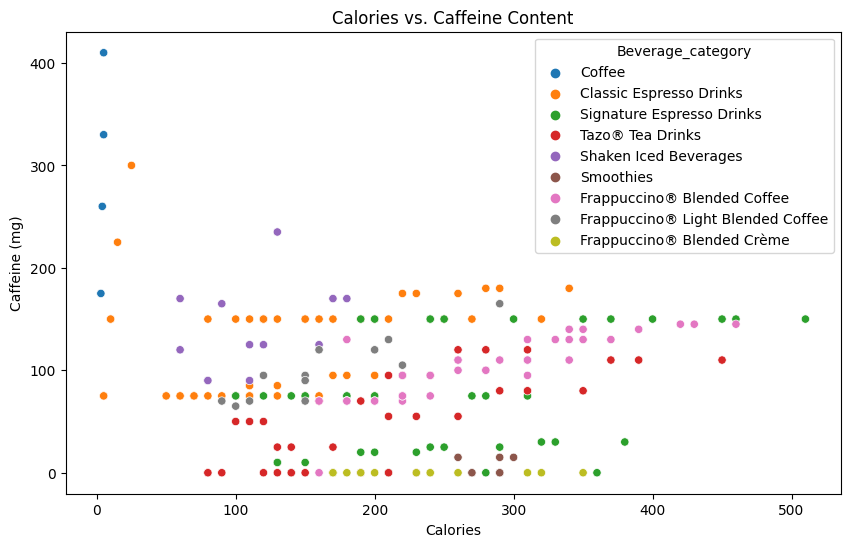

In [25]:
#1. Calories vs. Caffeine Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Caffeine (mg)',hue='Beverage_category', data=data)
plt.title('Calories vs. Caffeine Content')
plt.xlabel('Calories')
plt.ylabel('Caffeine (mg)')
plt.show()


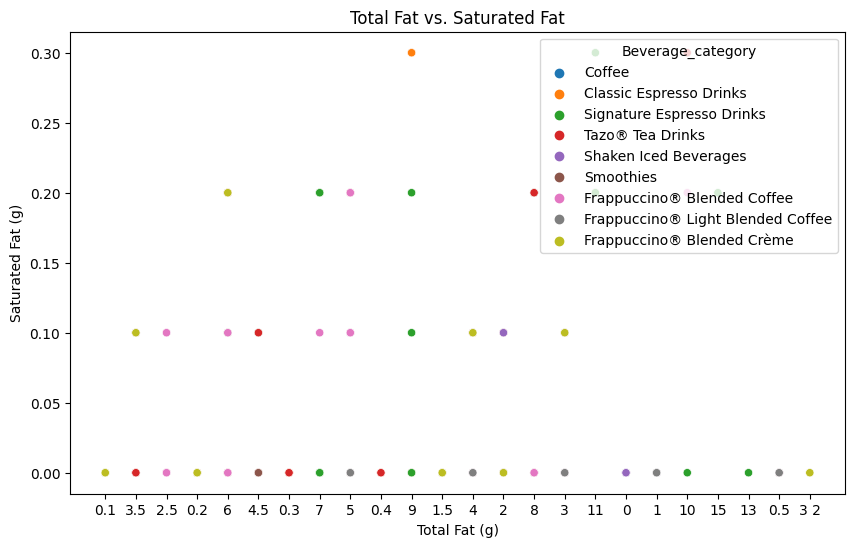

In [27]:
#2. Total Fat vs. Saturated Fat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Fat (g)', y='Saturated Fat (g)',hue='Beverage_category', data=data)
plt.title('Total Fat vs. Saturated Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Saturated Fat (g)')
plt.show()


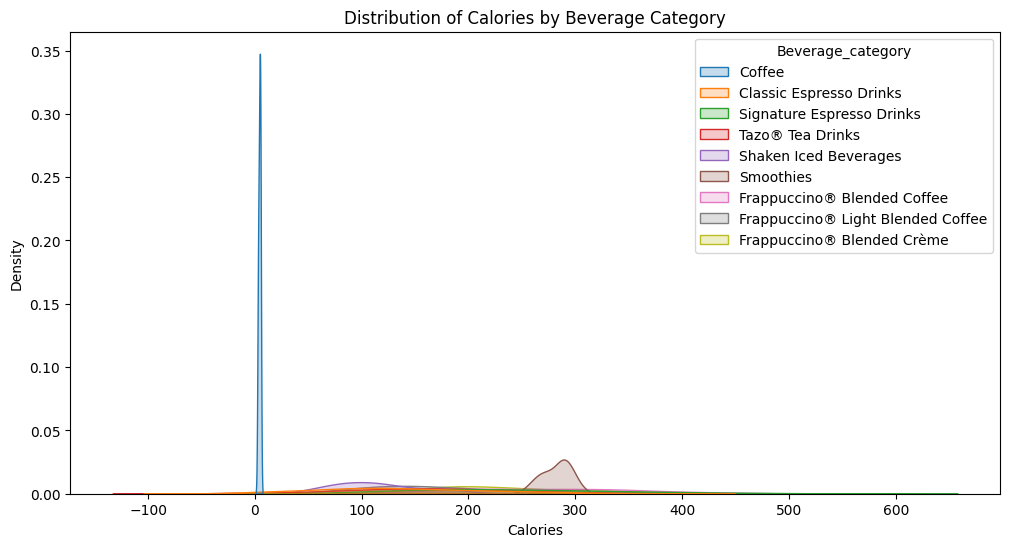

In [24]:
#3. Distribution of Calories by Beverage Category
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Calories', hue='Beverage_category', data=data, fill=True, common_norm=False)
plt.title('Distribution of Calories by Beverage Category')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()
